# Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)
tau_x, tau_y, tau_z, tau_0 = sigma_x, sigma_y, sigma_z, I2

# Parameters
g1, g2 = -0.5, 0.5

Nk = 201

kzs = np.linspace(-np.pi,np.pi, Nk)
ky = 0

L = 30 #OBC in x-direction
B = 2*np.pi/L # Magnetic field

# P - qA
# A = (-By, 0, 0 ), A (0, Bx, 0) along +z-direction
# q is assumed to be 1 and ignored

# LLs for Parent 1

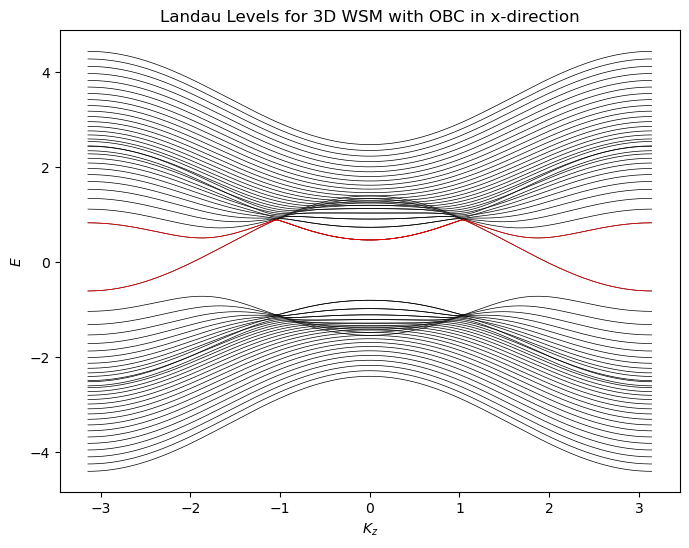

In [3]:
#Hamiltonian and diagonalization
P1_eigvals_oc_vs_kz = []
for kz in kzs:
    HP1_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_P10 = np.sin(ky+B*i)*tau_y+(2+g1-np.cos(ky+B*i)-np.cos(kz))*tau_z
        V_P10 = (-1j/2)*tau_x-(1/2)*tau_z
            
        HP1_open[2*i:2*i+2, 2*i:2*i+2] = H_P10
        if i < L - 1:
            HP1_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P10
            HP1_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P10.conj().T
        else:
            HP1_open[2*i:2*i+2, 0:2] = V_P10
            HP1_open[0:2, 2*i:2*i+2] = V_P10.conj().T
    
    P1_eigenvals_oc = np.linalg.eigvalsh(HP1_open)
    P1_eigvals_oc_vs_kz.append(P1_eigenvals_oc)

P1_eigvals_oc_vs_kz = np.array(P1_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,6))
for band in P1_eigvals_oc_vs_kz:
    ax.plot (kzs, band,  color='black', linewidth=0.5)
ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('Landau Levels for 3D WSM with OBC in x-direction')

mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, P1_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

plt.show()


# LLs for Parent 2

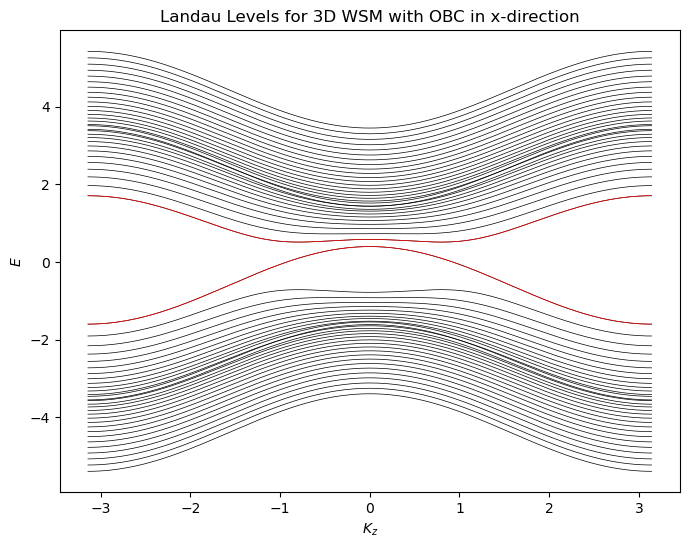

In [4]:
#Hamiltonian and diagonalization
P2_eigvals_oc_vs_kz = []
for kz in kzs:
    HP2_open = np.zeros((2*L, 2*L), dtype=complex)
    for i in range(L):
        H_P20 = np.sin(ky+B*i)*sigma_y+(2+g2-np.cos(ky+B*i)-np.cos(kz))*sigma_z
        V_P20 = (-1j/2)*sigma_x-(1/2)*sigma_z

        HP2_open[2*i:2*i+2, 2*i:2*i+2] = H_P20
        if i < L - 1:
            HP2_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P20
            HP2_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P20.conj().T
        else:
            HP2_open[2*i:2*i+2, 0:2] = V_P20
            HP2_open[0:2, 2*i:2*i+2] = V_P20.conj().T
    
    P2_eigenvals_oc = np.linalg.eigvalsh(HP2_open)
    P2_eigvals_oc_vs_kz.append(P2_eigenvals_oc)

P2_eigvals_oc_vs_kz = np.array(P2_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,6))
for band in P2_eigvals_oc_vs_kz:
    ax.plot (kzs, band,  color='black', linewidth=0.5)
ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('Landau Levels for 3D WSM with OBC in x-direction')

mid = L
for b in [mid-1, mid]:
    plt.plot(kzs, P2_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

plt.show()


# LLs for MWSM (Child)

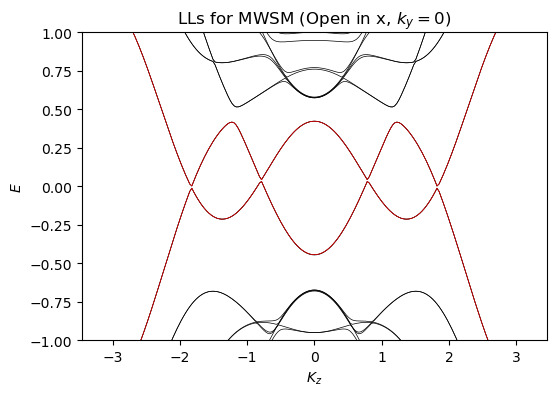

In [5]:
#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky+2*B*i)*tau_y+(2+g1-np.cos(ky+2*B*i)-np.cos(kz))*tau_z
        VP_1 = (-1j/2)*tau_x-(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky+2*B*i)*sigma_y-(2+g2-np.cos(ky+2*B*i)-np.cos(kz))*sigma_z
        VP_2 = (1j/2)*sigma_x+(1/2)*sigma_z
        VP_2d = VP_2.conj().T

        nHP_1 = np.sin(ky+2*B*(i+0.5))*tau_y+(2+g1-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*tau_z
        nVP_1 = (-1j/2)*tau_x-(1/2)*tau_z
        nVP_1d = nVP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        nHP_2 = np.sin(ky+2*B*(i+0.5))*sigma_y-(2+g2-np.cos(ky+2*B*(i+0.5))-np.cos(kz))*sigma_z
        nVP_2 = (1j/2)*sigma_x+(1/2)*sigma_z
        nVP_2d = nVP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (nHP_1, nVP_2)+ np.kron(nVP_1, nHP_2)

        #H matrix
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        else:
            H_child[4*i:4*(i+1), 0:4] = nearest
            H_child[0:4, 4*i:4*(i+1)] = nearest.conj().T
            H_child[4*i:4*(i+1), 4:8] = v_hops
            H_child[4:8, 4*i:4*(i+1)] = v_hops.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T         
        if i == L-2:
            H_child[4*i:4*(i+1), 0:4] = v_hops
            H_child[0:4, 4*i:4*(i+1)] = v_hops.conj().T   
            
        
    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(6,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('LLs for MWSM (Open in x, $k_y = 0$)')
ax.set_ylim (-1,1)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

plt.show()